In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Grad/seg/

clean_dataset  conjunctiva_segmentation.zip  extracted_conjunctiva  eye.png


In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

# # !unzip /content/drive/MyDrive/Grad/seg/conjunctiva_segmentation.zip -d /content/drive/MyDrive/Grad/seg/extracted_conjunctiva


In [ ]:
import os

images_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation"
print("Files and folders under dataset root:")
print(os.listdir(images_root))

for subdir in os.listdir(images_root):
    full_path = os.path.join(images_root, subdir)
    if os.path.isdir(full_path):
        print(f"\nContents of folder: {subdir}")
        print(os.listdir(full_path))

Files and folders under dataset root:
['masks', 'images']

Contents of folder: masks
['mask_of_img15.png', 'mask_of_img42.png', 'mask_of_img79.png', 'mask_of_img66.png', 'mask_of_img83.png', 'mask_of_img78.png', 'mask_of_img49.png', 'mask_of_img77.png', 'mask_of_img82.png', 'mask_of_img76.png', 'mask_of_img53.png', 'mask_of_img30.png', 'mask_of_img3.png', 'mask_of_img81.png', 'mask_of_img80.png', 'mask_of_img57.png', 'mask_of_img62.png', 'mask_of_img2.png', 'mask_of_img46.png', 'mask_of_img55.png', 'mask_of_img35.png', 'mask_of_img37.png', 'mask_of_img26.png', 'mask_of_img27.png', 'mask_of_img18.png', 'mask_of_img68.png', 'mask_of_img32.png', 'mask_of_img36.png', 'mask_of_img10.png', 'mask_of_img92.png', 'mask_of_img29.png', 'mask_of_img39.png', 'mask_of_img58.png', 'mask_of_img75.png', 'mask_of_img17.png', 'mask_of_img90.png', 'mask_of_img89.png', 'mask_of_img64.png', 'mask_of_img45.png', 'mask_of_img25.png', 'mask_of_img41.png', 'mask_of_img7.png', 'mask_of_img72.png', 'mask_of_img85

In [ ]:
import os

images_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/images"
masks_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/masks"

if os.path.exists(os.path.join(images_root, "img80.jpg")):
    print(f"Found img80.png in {images_root}")
else:
    print("img80.png not found in images folder")

if os.path.exists(os.path.join(masks_root, "mask_of_img80.png")):
    print(f"Found mask_of_img80.jpg in {masks_root}")
else:
    print("mask_of_img80.png not found in masks folder")


Found img80.png in /content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/images
Found mask_of_img80.jpg in /content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/masks


In [ ]:
import os

images_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/images"
masks_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/masks"

# List all image files
image_files = [f for f in os.listdir(images_root) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Check for corresponding masks
missing_masks = []

for image_file in image_files:
    base_name = os.path.splitext(image_file)[0]  # 'img1' from 'img1.jpg'
    expected_mask = f"mask_of_{base_name}.png"
    mask_path = os.path.join(masks_root, expected_mask)

    if not os.path.isfile(mask_path):
        missing_masks.append(image_file)

# Report
if missing_masks:
    print("The following images are missing corresponding masks:")
    for img in missing_masks:
        print(f"- {img}")
else:
    print("All images have corresponding masks.")


All images have corresponding masks.


In [ ]:
import os

# Define your directories
images_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/images"
masks_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/masks"

# List all image and mask files
image_files = [f for f in os.listdir(images_root) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
mask_files = [f for f in os.listdir(masks_root) if f.lower().endswith('.png')]

# Print counts
print("Before Cleaning:")
print(f"Number of image files: {len(image_files)}")
print(f"Number of mask files: {len(mask_files)}")


Before Cleaning:
Number of image files: 180
Number of mask files: 180


In [ ]:
import os
import shutil

# Original folders
images_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/images"
masks_root = "/content/drive/MyDrive/Grad/seg/extracted_conjunctiva/conjunctiva_segmentation/masks"

# Clean output folders
clean_images = "/content/drive/MyDrive/Grad/seg/clean_dataset/images"
clean_masks = "/content/drive/MyDrive/Grad/seg/clean_dataset/masks"
os.makedirs(clean_images, exist_ok=True)
os.makedirs(clean_masks, exist_ok=True)

# List of unwanted mask numbers
unwanted_indices = [1,101,102,104,107,11,110,112,113,115,116,117,118,112,120,123,125,126,129,
                    132,134,135,138,139,140,142,144,145,147,148,15,150,151,154,156,157,158,159,
                    161,162,165,167,168,170,171,173,174,175,176,179,18,2,21,25,28,31,35,38,41,
                    44,48,5,51,54,58,61,64,67,69,70,75,76,77,8,83,85,86,89,90,92,93,96,99,12,73]

# Convert to mask/image base names
unwanted_masks = [f"mask_of_img{x}.png" for x in unwanted_indices]
unwanted_bases = [f"img{x}" for x in unwanted_indices]

# Get all image files and mask files
all_image_files = os.listdir(images_root)
all_mask_files = os.listdir(masks_root)

# Initialize lists to keep track of copied files
copied_images = []
copied_masks = []

# Copy only the good images/masks to clean folders
for image_file in all_image_files:
    base = os.path.splitext(image_file)[0]
    if base not in unwanted_bases:
        src_img = os.path.join(images_root, image_file)
        dst_img = os.path.join(clean_images, image_file)
        shutil.copy2(src_img, dst_img)
        copied_images.append(image_file)

for mask_file in all_mask_files:
    if mask_file not in unwanted_masks:
        src_mask = os.path.join(masks_root, mask_file)
        dst_mask = os.path.join(clean_masks, mask_file)
        shutil.copy2(src_mask, dst_mask)
        copied_masks.append(mask_file)

# Print the summary of the clean dataset
print(f"✅ Clean dataset created at /content/drive/MyDrive/Grad/seg/clean_dataset/")
print(f"Copied {len(copied_images)} images to {clean_images}")
print(f"Copied {len(copied_masks)} masks to {clean_masks}")


✅ Clean dataset created at /content/drive/MyDrive/Grad/seg/clean_dataset/
Copied 96 images to /content/drive/MyDrive/Grad/seg/clean_dataset/images
Copied 96 masks to /content/drive/MyDrive/Grad/seg/clean_dataset/masks


# Model

Found 96 images and 96 masks.
Train set size: (76, 128, 128, 3), Validation set size: (20, 128, 128, 3)
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.9428 - loss: 49.8026 - val_accuracy: 0.9399 - val_loss: 0.3870 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9470 - loss: 0.3034 - val_accuracy: 0.9399 - val_loss: 0.2554 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9471 - loss: 0.2021 - val_accuracy: 0.9399 - val_loss: 0.1804 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9451 - loss: 0.1455 - val_accuracy: 0.9399 - val_loss: 0.1654 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9438 - loss: 0.1412 - val_accuracy: 0.9399 - val_loss: 0.1180 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9449 - loss: 0.1172 - val_accuracy: 0.9399 - val_loss: 0.1036 - learnin

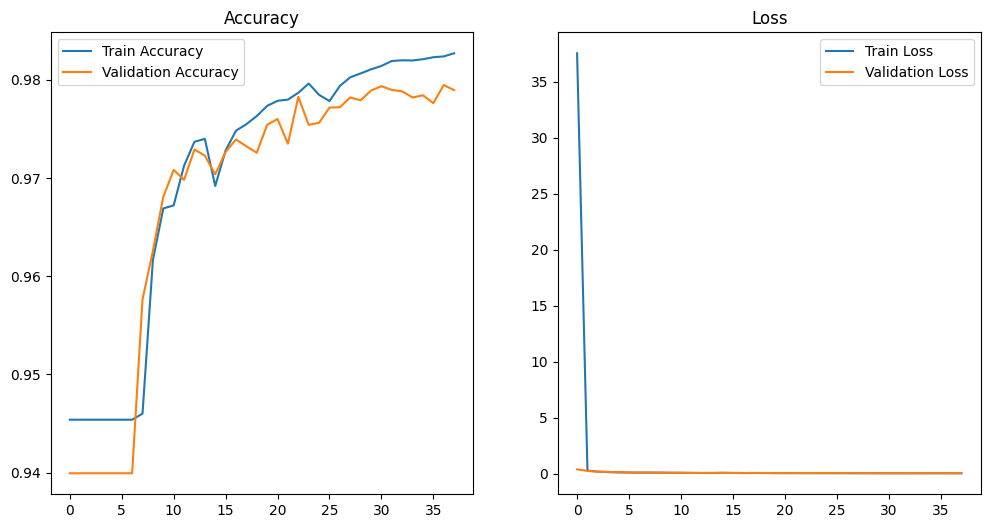

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")

dataset_root = "/content/drive/MyDrive/Grad/seg/clean_dataset"
image_dir = os.path.join(dataset_root, 'images')
mask_dir = os.path.join(dataset_root, 'masks')

image_paths = sorted([
    os.path.join(image_dir, fname)
    for fname in os.listdir(image_dir)
    if fname.endswith(('.png', '.jpg', '.jpeg'))
])
mask_paths = sorted([
    os.path.join(mask_dir, fname)
    for fname in os.listdir(mask_dir)
    if fname.endswith(('.png', '.jpg', '.jpeg'))
])

image_dict = {os.path.splitext(os.path.basename(p))[0]: p for p in image_paths}
mask_dict = {
    os.path.splitext(os.path.basename(p))[0].replace("mask_of_", ""): p
    for p in mask_paths
}

valid_images = []
valid_masks = []

for key in image_dict:
    if key in mask_dict:
        valid_images.append(image_dict[key])
        valid_masks.append(mask_dict[key])

print(f"Found {len(valid_images)} images and {len(valid_masks)} masks.")

def show_sample(image_path, mask_path):
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.show()


IMG_HEIGHT, IMG_WIDTH = 128, 128

X = []
Y = []

for img_path, mask_path in zip(valid_images, valid_masks):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))
    mask = (mask > 0).astype(np.float32)  # Ensure mask is binary: 0 for background, 1 for object
    mask = np.expand_dims(mask, axis=-1)  # (H, W, 1)

    X.append(img)
    Y.append(mask)

X = np.array(X)
Y = np.array(Y)

train_images, val_images, train_masks, val_masks = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f"Train set size: {train_images.shape}, Validation set size: {val_images.shape}")

def unet(input_size=(IMG_HEIGHT, IMG_WIDTH, 3)):
    inputs = Input(input_size)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    return model

model = unet(input_size=(IMG_HEIGHT, IMG_WIDTH, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

history = model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    epochs=50,
    batch_size=8,
    callbacks=[early_stop, lr_reduction]
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


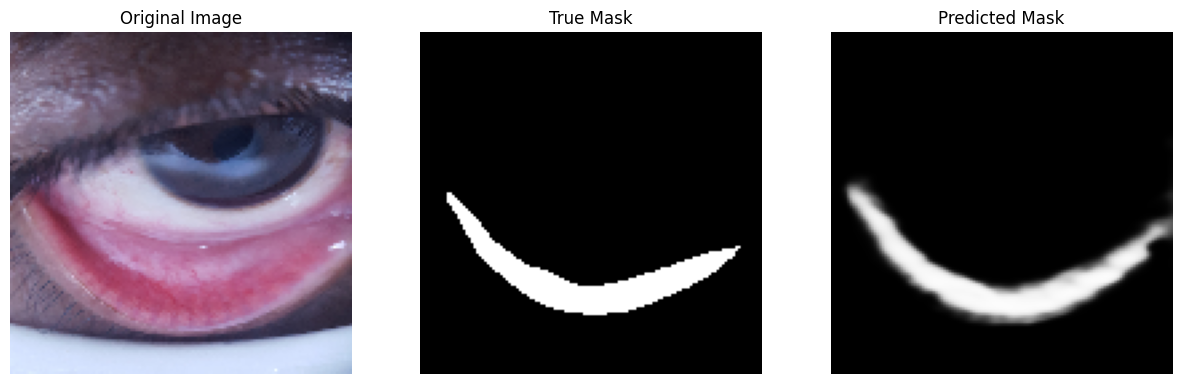

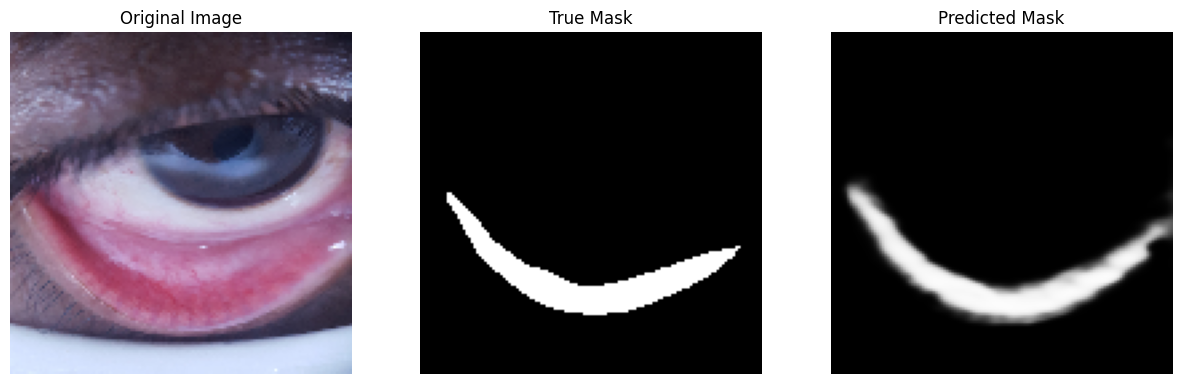

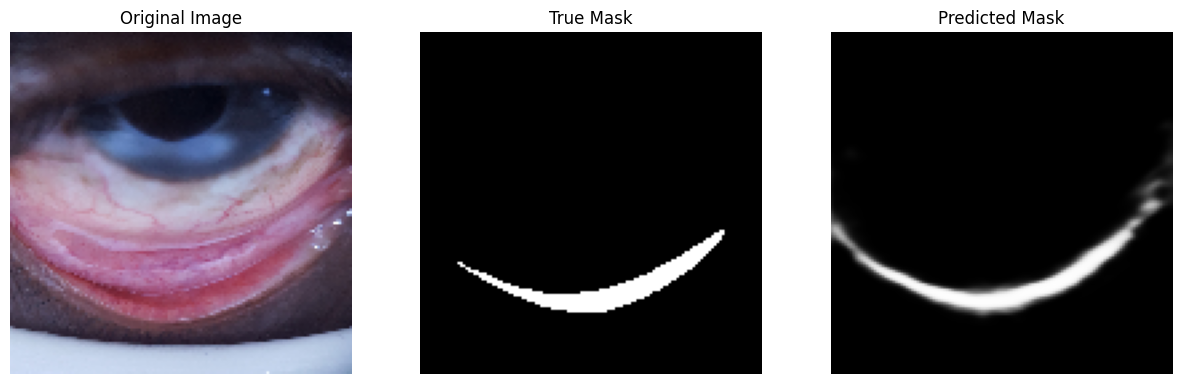

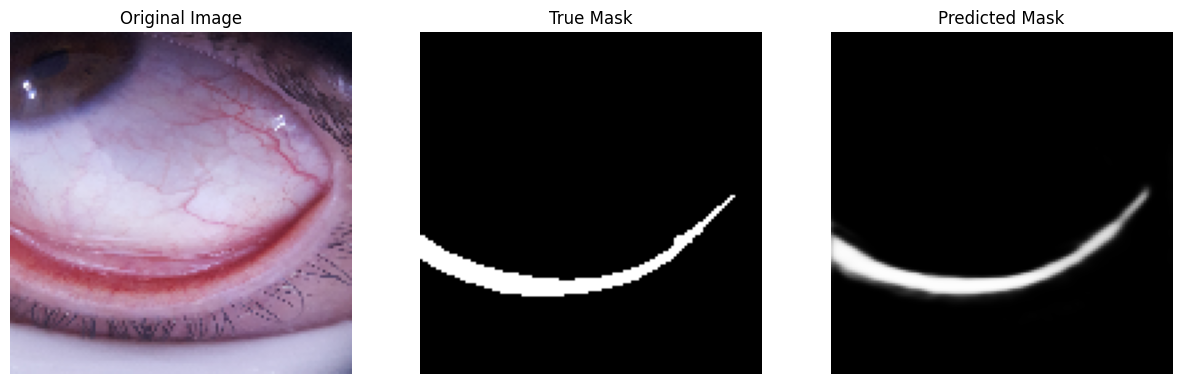

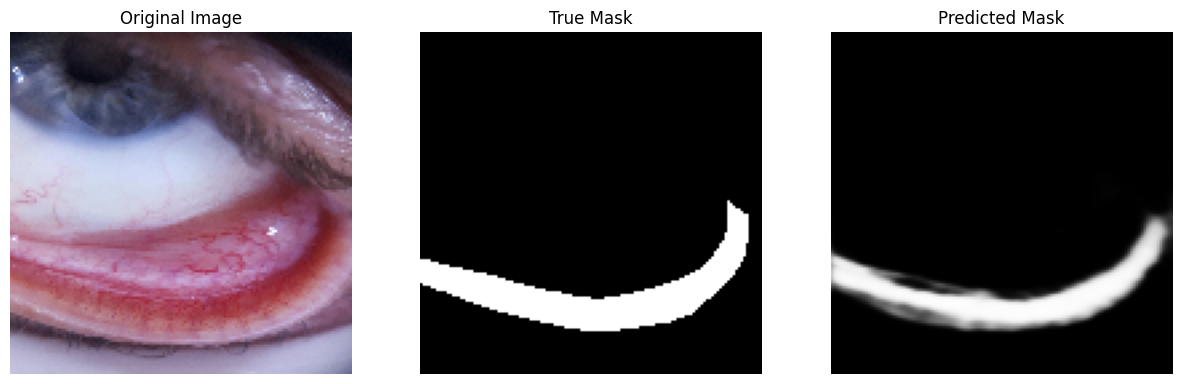

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Get predictions on the validation set
predictions = model.predict(val_images)

# Select a few random indices from the validation set to visualize
indices = np.random.randint(0, len(val_images), size=5)

# Visualize the original image, true mask, and predicted mask
for idx in indices:
    original_image = val_images[idx]
    true_mask = val_masks[idx]
    predicted_mask = predictions[idx]

    # Convert original image, true mask, and predicted mask to RGB if needed
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    true_mask_rgb = cv2.cvtColor(true_mask, cv2.COLOR_BGR2RGB)
    predicted_mask_rgb = cv2.cvtColor(predicted_mask, cv2.COLOR_BGR2RGB)

    # Plot the results
    plt.figure(figsize=(15, 5))

    # Display Original Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image_rgb)
    plt.axis('off')

    # Display True Mask
    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(true_mask_rgb)
    plt.axis('off')

    # Display Predicted Mask
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(predicted_mask_rgb)
    plt.axis('off')

    plt.show()
